In [141]:
# importing required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.stats import skew
%matplotlib inline

In [142]:
# Load the Big Mart Sales Data 
train_data = pd.read_csv('bigdatamart_Train.csv.txt')
test_data = pd.read_csv('bigdatamart_Test.csv.txt')

# Predicting Big-Mart-Sales

In [143]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [144]:
train_data.keys()

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [145]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [146]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [147]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [148]:
# Checking the data 
print(test_data['Item_Fat_Content'].unique())
print(train_data['Item_Fat_Content'].unique())

['Low Fat' 'reg' 'Regular' 'LF' 'low fat']
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [149]:
# combining Item_Fat_Content misspelled
train_data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
test_data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [150]:
print(test_data['Item_Fat_Content'].unique())
print(train_data['Item_Fat_Content'].unique())

['Low Fat' 'Regular']
['Low Fat' 'Regular']


In [151]:
# Checking Item_Type

print(train_data.sort_values('Item_Type')['Item_Type'].unique())
print(test_data.sort_values('Item_Type')['Item_Type'].unique())


['Baking Goods' 'Breads' 'Breakfast' 'Canned' 'Dairy' 'Frozen Foods'
 'Fruits and Vegetables' 'Hard Drinks' 'Health and Hygiene' 'Household'
 'Meat' 'Others' 'Seafood' 'Snack Foods' 'Soft Drinks' 'Starchy Foods']
['Baking Goods' 'Breads' 'Breakfast' 'Canned' 'Dairy' 'Frozen Foods'
 'Fruits and Vegetables' 'Hard Drinks' 'Health and Hygiene' 'Household'
 'Meat' 'Others' 'Seafood' 'Snack Foods' 'Soft Drinks' 'Starchy Foods']


In [152]:
# Handling  train_data NUll Values
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(),inplace = True)
train_data['Outlet_Size'].fillna('Medium',inplace = True)

In [153]:
# Handling test_data NUll Values
test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean(),inplace = True)
test_data['Outlet_Size'].fillna('Medium',inplace = True)

In [154]:
# find out the catagorical variables
col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

In [155]:
# handling catagorical variables
train_datar = pd.get_dummies(train_data, columns = col, drop_first = True)
test_datar = pd.get_dummies(test_data, columns = col,drop_first = True)

C:\Users\lenovo\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


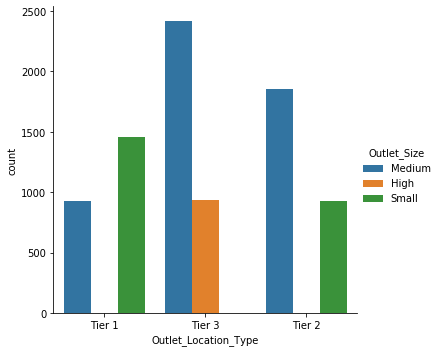

In [156]:
sns.factorplot('Outlet_Location_Type',data = train_data,hue ='Outlet_Size' ,kind='count')

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


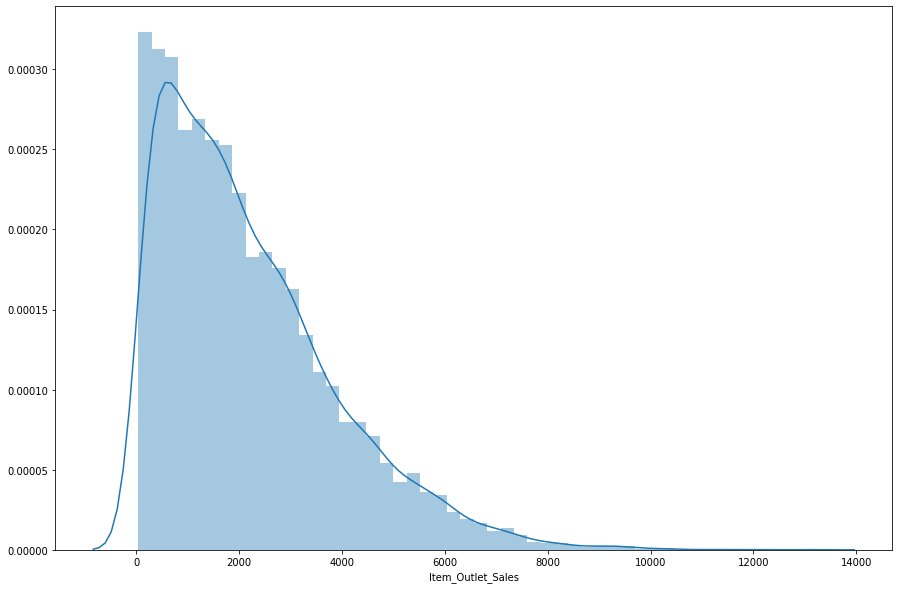

In [157]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(train_datar['Item_Outlet_Sales'])

In [158]:
feat_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3']

In [159]:
train_datar.keys()

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Outlet_Sales',
       'Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [160]:
x = train_datar[feat_cols]
y = train_datar['Item_Outlet_Sales']

In [161]:
# Lets Check Outliers in the Dataset 

# IQR score technique to remove Outliers 
Q1 = train_datar.quantile(0.25)
Q3 = train_datar.quantile(0.75)
IQR = Q3 - Q1
print(IQR.shape)
dfIQR = train_datar[~((train_datar < (Q1-1.5 * IQR)) |(train_datar > (Q3 + 1.5 * IQR))).any(axis=1)]
dfIQR.shape

(28,)


(489, 30)

In [162]:
# finding the Skewness 
print (x.skew())

Item_Weight                         0.090561
Item_Visibility                     1.167091
Item_MRP                            0.127202
Item_Fat_Content_Regular            0.616705
Item_Type_Breads                    5.567533
Item_Type_Breakfast                 8.632562
Item_Type_Canned                    3.196644
Item_Type_Dairy                     3.096356
Item_Type_Frozen Foods              2.659119
Item_Type_Fruits and Vegetables     2.021988
Item_Type_Hard Drinks               6.071724
Item_Type_Health and Hygiene        3.668801
Item_Type_Household                 2.547106
Item_Type_Meat                      4.136741
Item_Type_Others                    6.889767
Item_Type_Seafood                  11.411629
Item_Type_Snack Foods               2.065882
Item_Type_Soft Drinks               4.026612
Item_Type_Starchy Foods             7.390855
Outlet_Size_Medium                 -0.453138
Outlet_Size_Small                   0.979119
Outlet_Location_Type_Tier 2         0.738834
Outlet_Loc

In [163]:
print (dfIQR.skew())


Item_Weight                        0.263868
Item_Visibility                    0.688658
Item_MRP                           0.414690
Outlet_Establishment_Year         -0.667615
Item_Outlet_Sales                  0.939206
Item_Fat_Content_Regular           0.020514
Item_Type_Breads                   0.000000
Item_Type_Breakfast                0.000000
Item_Type_Canned                   0.000000
Item_Type_Dairy                    0.000000
Item_Type_Frozen Foods             0.000000
Item_Type_Fruits and Vegetables    0.000000
Item_Type_Hard Drinks              0.000000
Item_Type_Health and Hygiene       0.000000
Item_Type_Household                0.000000
Item_Type_Meat                     0.000000
Item_Type_Others                   0.000000
Item_Type_Seafood                  0.000000
Item_Type_Snack Foods              0.000000
Item_Type_Soft Drinks              0.000000
Item_Type_Starchy Foods            0.000000
Outlet_Size_Medium                 0.028721
Outlet_Size_Small               

In [164]:
# Apply Log Transformation
dfIQR['Outlet_Type_Supermarket Type1'] = np.log(dfIQR['Outlet_Type_Supermarket Type1']+1)
dfIQR['Outlet_Location_Type_Tier 3'] = np.log(dfIQR['Outlet_Location_Type_Tier 3'] + 1)
dfIQR['Outlet_Establishment_Year'] = np.log(dfIQR['Outlet_Establishment_Year'] + 1)
dfIQR.describe()

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.0,489.0,489.0,489.0,...,489.0,489.0,489.0,489.000000,489.000000,489.000000,489.000000,489.000000,489.0,489.0
mean,12.339320,0.066044,125.305495,7.600476,1800.521987,0.494888,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.492843,0.361963,0.425358,0.147461,0.597168,0.0,0.0
std,4.637566,0.045227,57.822851,0.003509,1385.785089,0.500486,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.500461,0.481060,0.494903,0.283936,0.240234,0.0,0.0
min,4.880000,0.000000,35.087400,7.593878,37.284800,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,8.315000,0.031713,83.793400,7.599902,656.478800,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.693359,0.0,0.0
50%,12.300000,0.057557,111.154400,7.600902,1491.392000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.693359,0.0,0.0
75%,15.600000,0.094010,169.613200,7.603399,2665.863200,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.000000,0.693359,0.0,0.0
max,20.850000,0.191603,265.556800,7.604894,6426.301600,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.693359,0.693359,0.0,0.0


In [165]:
dx = dfIQR[feat_cols]
dy = dfIQR['Item_Outlet_Sales']

In [166]:
# splitting data as X_train and X_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dx, dy, test_size = 0.2,random_state = 0)

In [167]:
#Linear Regression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [172]:
coeff_df = pd.DataFrame(regressor.coef_, dx.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Item_Weight,-1.220425e+01
Item_Visibility,-1.241119e+02
Item_MRP,1.411588e+01
Item_Fat_Content_Regular,7.066280e+01
Item_Type_Breads,0.000000e+00
Item_Type_Breakfast,-1.136868e-13
Item_Type_Canned,1.136868e-13
Item_Type_Dairy,-2.415845e-13
Item_Type_Frozen Foods,0.000000e+00
Item_Type_Fruits and Vegetables,0.000000e+00


In [169]:
y_pred = regressor.predict(X_test)

In [170]:
# calculating RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

994.3090592037436

In [178]:
y_pred

array([ 1769.41578167,  2700.21507955,   726.40646692,  3267.36939231,
        1478.72537649,  3005.93589921,  2275.17611752,  2036.01353427,
        1696.71456146,   948.50065805,  1319.32919793,  1032.49292376,
        1394.80715969,  1578.2544727 ,  3358.52700532,  1983.0461683 ,
        3544.34313005,  1659.18663878,  1006.71611829,  2796.27536948,
        2432.24028793,  1809.30567066,  1460.38184743, -1104.16204732,
        3628.30856694,  1595.44225166,  1810.21572164,   338.26417559,
        1532.01231849,  2410.67822322,  2889.14006424,  1385.07880756,
        1173.00950753,  1610.44432021,   926.76994212,  3608.69746921,
        1804.38233191,  1573.09039897,   964.59938019,  2591.33315677,
        2003.86001377,  1623.92297306,   663.31690709,  1795.60971185,
        2740.32088193,  3007.50613952,  1165.82800368,  2877.73357513,
        2977.33419186,  -245.13280237,  2185.91723559,  1010.65783832,
        3576.55771115,  1657.50009949,  2930.84745315,  -175.60802967,
      

In [179]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
299,2364.9216,1769.415782
4369,1078.5960,2700.215080
2624,846.8976,726.406467
6750,3094.6384,3267.369392
1753,1158.4920,1478.725376
...,...,...
7588,1845.5976,1731.387958
4314,5106.6860,3052.084963
5264,1069.2748,872.795123
8416,925.4620,1499.186617
